In [1]:
%matplotlib inline
import pandas as pd

In [ ]:
# from IPython.core.display import HTML
# css = open('style-table.css').read() + open('style-notebook.css').read()
# HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [16]:
release_dates = pd.read_csv('data/release_dates.csv',parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [21]:
release_dates.rename(columns = {'date_published' : 'date'}, inplace = True)

In [25]:
release_dates = release_dates[release_dates.date != 'TV Movie 2019']
release_dates['date'] = pd.to_datetime(release_dates.date)

### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

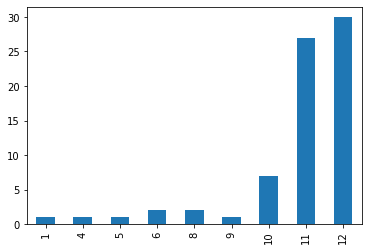

In [30]:
r = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
r.date.dt.month.value_counts().sort_index().plot(kind = 'bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

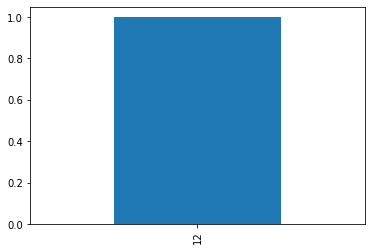

In [49]:
r = r[(r.country == 'USA')]
r = release_dates[release_dates.title.str.startswith('The Hobbit')]
r.date.dt.month.value_counts().sort_index().plot(kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

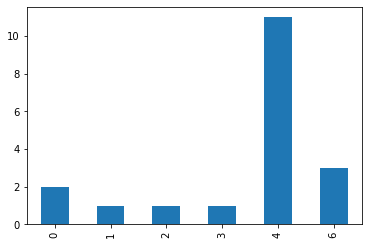

In [38]:
r = release_dates[(release_dates.title.str.contains('Romance')) & (release_dates.country == 'USA')]
r.date.dt.dayofweek.value_counts().sort_index().plot(kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

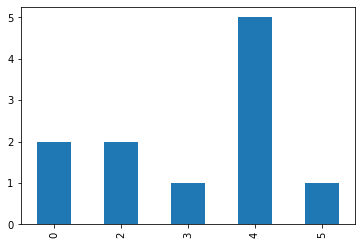

In [40]:
r = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
r.date.dt.dayofweek.value_counts().sort_index().plot(kind = 'bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [51]:
r = release_dates[(release_dates.country == 'USA')]
r = r[(r.actors.notnull()) & (r.actors.str.contains('Judi Dench'))]
r = r[(r.date.dt.year >= 1990) & (r.date.dt.year <= 1999)]
r[['title', 'date']]

,title,date


### In which months do films with Judi Dench tend to be released in the USA?

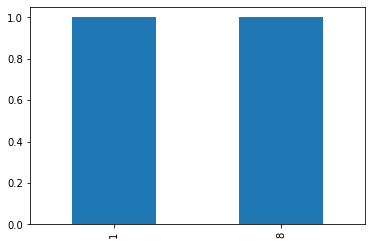

In [43]:
r = release_dates[release_dates.country == 'USA']
c = cast[(cast.name == 'Judi Dench')]
newdf = c.merge(r).sort_values('date')
newdf.date.dt.month.value_counts().plot(kind = 'bar')

### In which months do films with Tom Cruise tend to be released in the USA?

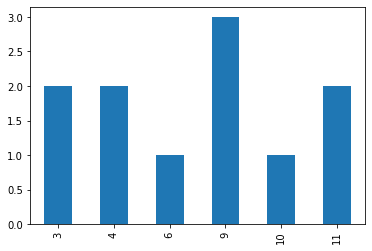

In [45]:
r = release_dates[release_dates.country == 'USA']
c = cast[(cast.name == 'Tom Cruise')]
newdf = c.merge(r).sort_values('date')
newdf.date.dt.month.value_counts().sort_index().plot(kind = 'bar')